# pybis2spice stm32g031 Example 

This notebook provides an example of how to use the pybis2spice package.

In [1]:
# Directory setup
import sys
import os
  
current = os.path.dirname(os.getcwd())
parent = os.path.dirname(current)
sys.path.append(parent)

In [2]:
# Import the library
import pybis2spice

## User Inputs

The user need to provide the following information: 
* file_path to the ibis model file location
* model_name - The name of the model of interest within the ibis file
* component_name - The name of the component/package of interest within the ibis file

In [2]:
file_path = 'ibis/stm32g0_ibis/stm32g031_041_ufqfpn28.ibs'
model_name = 'io6_ft_3v3_highspeed'
component_name = 'stm32g031_041_ufqfpn28'

## Input Data Processing

In [5]:
# Loads the IBIS model with the user input parameters 
ibis_data = pybis2spice.DataModel(file_path, model_name, component_name)


# printing the output allows the user to scan and check that the right data has been loaded
#print(ibis_data) 

'Model' object has no attribute 'pullup_reference'


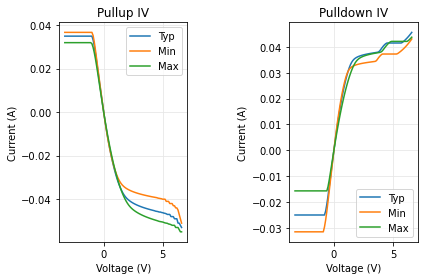

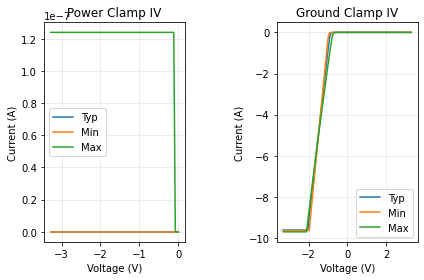

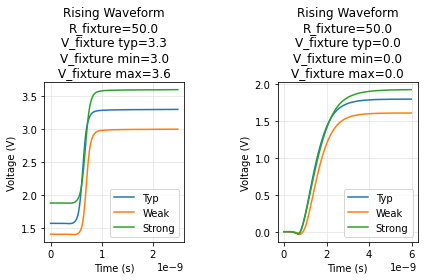

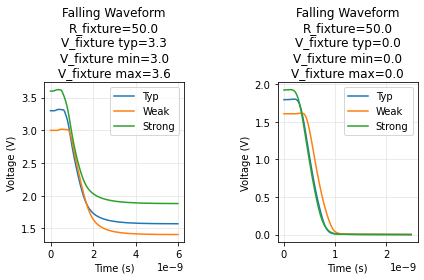

In [10]:
# The package provides some plot functions to help visualise the input data. 
# If a graph is missing, then it is likely that the data does not exist within the IBIS model
pybis2spice.plot_all_ibis_data(ibis_data)

## Solving the K-parameters

The K-parameters are the k(t) waveforms that define the transient behaviour of the pullup and pulldown transistor devices during rising and falling edges.

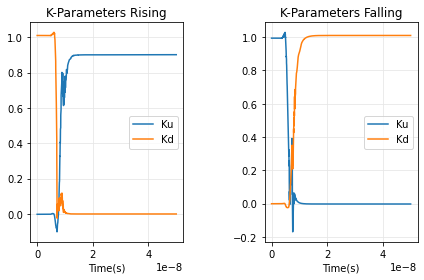

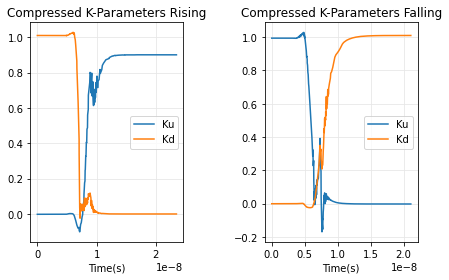

In [27]:
k_r = pybis2spice.solve_k_params_output(ibis_data, corner=1, waveform_type="Rising")
k_f = pybis2spice.solve_k_params_output(ibis_data, corner=1, waveform_type="Falling")

k_r_comp = pybis2spice.compress_param(k_r, threshold=1e-6)
k_f_comp = pybis2spice.compress_param(k_f, threshold=1e-6)

pybis2spice.plot_dual(k_r, k_f, ["Ku", "Kd"], "Time(s)", "", "K-Parameters Rising", "K-Parameters Falling")
pybis2spice.plot_dual(k_r_comp, k_f_comp, ["Ku", "Kd"], "Time(s)", "", "Compressed K-Parameters Rising", "Compressed K-Parameters Falling")

## Generating a subcircuit file

In [3]:
(offset_neg_r, offset_pos_r) = pybis2spice.determine_crossover_offsets(k_r_comp)
(offset_neg_f, offset_pos_f) = pybis2spice.determine_crossover_offsets(k_f_comp)

In [3]:
filepath = f'spice_models/{model_name}_{component_name}_Typ.sub'
pybis2spice.create_output_subcircuit_file(ibis_data, filepath, k_r_comp, k_f_comp)

